# IREI: Profile-based retrieval
### Víctor Morcuende Castell and Guillermo Nájera Lavid
#### Course 2022-2023

### Preprocessing Phase

In [1]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /Users/victor/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/victor/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/victor/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/victor/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/victor/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to
[nltk_data]

True

In [2]:
# Read the data
import pandas as pd

train_data = pd.read_csv('dataset/BBC News Train.csv')
test_data = pd.read_csv('dataset/BBC News Test.csv')

# Transform the data into a single dataset
data = pd.concat([train_data,test_data])
data.to_csv('dataset/data.csv', index=False)
data.head(10)

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
5,1582,howard truanted to play snooker conservative...,politics
6,651,wales silent on grand slam talk rhys williams ...,sport
7,1797,french honour for director parker british film...,entertainment
8,2034,car giant hit by mercedes slump a slump in pro...,business
9,1866,fockers fuel festive film chart comedy meet th...,entertainment


In [3]:
data.shape

(2225, 3)

In [4]:
data.groupby(['Category']).size().sort_values(ascending=True)

Category
tech             408
entertainment    420
politics         421
business         483
sport            493
dtype: int64

<Axes: >

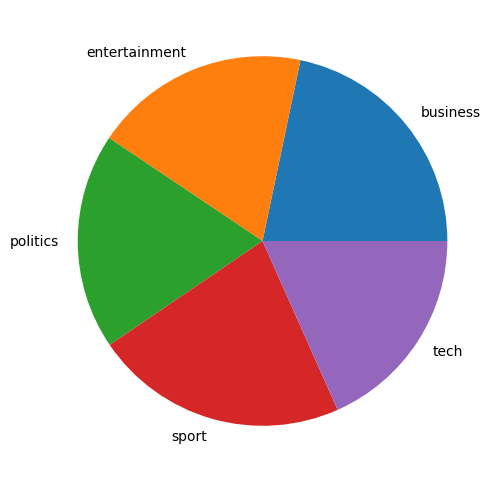

In [5]:
data.groupby(['Category']).size().plot(kind='pie', figsize=(10, 6))

<Axes: ylabel='Category'>

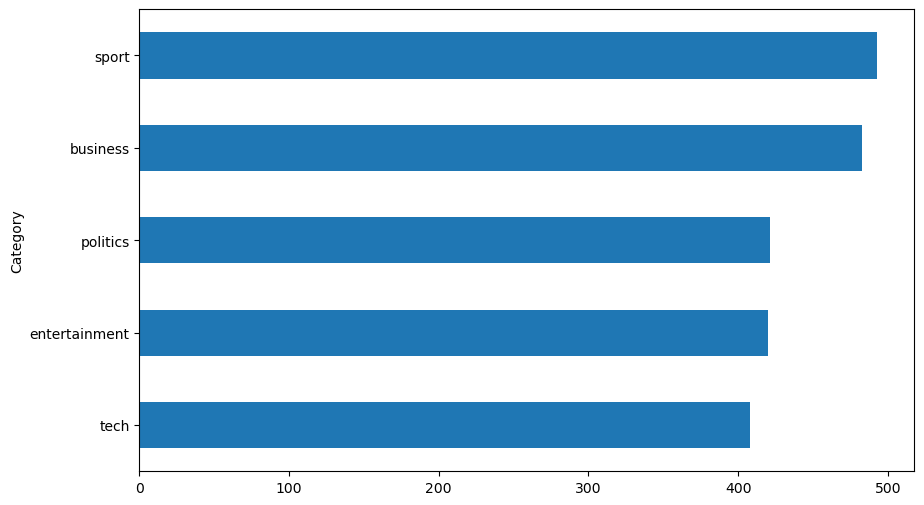

In [6]:
data.groupby(['Category']).size().sort_values(ascending=True).plot(kind='barh', figsize=(10, 6))

In [7]:
# Remove all punctuations from the text
import string as st

def remove_punct(text):
    return ("".join([ch for ch in text if ch not in st.punctuation]))

data['removed_punc'] = data['Text'].apply(lambda x: remove_punct(x))
data.head()

,ArticleId,Text,Category,removed_punc
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom exboss launches defence lawyers defen...
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster bett...
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses in 168m payout eighteen former en...


In [8]:
# Convert text to lower case tokens
import re

def tokenize(text):
    text = re.split('\s+' ,text)
    return [x.lower() for x in text]

data['tokens'] = data['removed_punc'].apply(lambda msg : tokenize(msg))
data.head()

,ArticleId,Text,Category,removed_punc,tokens
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom exboss launches defence lawyers defen...,"[worldcom, exboss, launches, defence, lawyers,..."
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...,"[german, business, confidence, slides, german,..."
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...,"[bbc, poll, indicates, economic, gloom, citize..."
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster bett...,"[lifestyle, governs, mobile, choice, faster, b..."
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses in 168m payout eighteen former en...,"[enron, bosses, in, 168m, payout, eighteen, fo..."


In [9]:
# Remove tokens of length less than 3
def remove_small_words(text):
    return [x for x in text if len(x) > 3 ]

data['larger_tokens'] = data['tokens'].apply(lambda x : remove_small_words(x))
data.head()

,ArticleId,Text,Category,removed_punc,tokens,larger_tokens
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom exboss launches defence lawyers defen...,"[worldcom, exboss, launches, defence, lawyers,...","[worldcom, exboss, launches, defence, lawyers,..."
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...,"[german, business, confidence, slides, german,...","[german, business, confidence, slides, german,..."
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...,"[bbc, poll, indicates, economic, gloom, citize...","[poll, indicates, economic, gloom, citizens, m..."
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster bett...,"[lifestyle, governs, mobile, choice, faster, b...","[lifestyle, governs, mobile, choice, faster, b..."
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses in 168m payout eighteen former en...,"[enron, bosses, in, 168m, payout, eighteen, fo...","[enron, bosses, 168m, payout, eighteen, former..."


In [10]:
# Remove stopwords by using NLTK corpus list
def remove_stopwords(text):
    return [word for word in text if word not in nltk.corpus.stopwords.words('english')]

data['clean_tokens'] = data['larger_tokens'].apply(lambda x : remove_stopwords(x))
data.head()

,ArticleId,Text,Category,removed_punc,tokens,larger_tokens,clean_tokens
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom exboss launches defence lawyers defen...,"[worldcom, exboss, launches, defence, lawyers,...","[worldcom, exboss, launches, defence, lawyers,...","[worldcom, exboss, launches, defence, lawyers,..."
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...,"[german, business, confidence, slides, german,...","[german, business, confidence, slides, german,...","[german, business, confidence, slides, german,..."
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...,"[bbc, poll, indicates, economic, gloom, citize...","[poll, indicates, economic, gloom, citizens, m...","[poll, indicates, economic, gloom, citizens, m..."
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster bett...,"[lifestyle, governs, mobile, choice, faster, b...","[lifestyle, governs, mobile, choice, faster, b...","[lifestyle, governs, mobile, choice, faster, b..."
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses in 168m payout eighteen former en...,"[enron, bosses, in, 168m, payout, eighteen, fo...","[enron, bosses, 168m, payout, eighteen, former...","[enron, bosses, 168m, payout, eighteen, former..."


In [11]:
# Apply lemmatization on tokens
from nltk import WordNetLemmatizer

def lemmatize(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]

data['lemma_words'] = data['clean_tokens'].apply(lambda x : lemmatize(x))
data.head()

,ArticleId,Text,Category,removed_punc,tokens,larger_tokens,clean_tokens,lemma_words
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom exboss launches defence lawyers defen...,"[worldcom, exboss, launches, defence, lawyers,...","[worldcom, exboss, launches, defence, lawyers,...","[worldcom, exboss, launches, defence, lawyers,...","[worldcom, exboss, launch, defence, lawyer, de..."
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...,"[german, business, confidence, slides, german,...","[german, business, confidence, slides, german,...","[german, business, confidence, slides, german,...","[german, business, confidence, slide, german, ..."
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...,"[bbc, poll, indicates, economic, gloom, citize...","[poll, indicates, economic, gloom, citizens, m...","[poll, indicates, economic, gloom, citizens, m...","[poll, indicates, economic, gloom, citizen, ma..."
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster bett...,"[lifestyle, governs, mobile, choice, faster, b...","[lifestyle, governs, mobile, choice, faster, b...","[lifestyle, governs, mobile, choice, faster, b...","[lifestyle, governs, mobile, choice, faster, b..."
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses in 168m payout eighteen former en...,"[enron, bosses, in, 168m, payout, eighteen, fo...","[enron, bosses, 168m, payout, eighteen, former...","[enron, bosses, 168m, payout, eighteen, former...","[enron, boss, 168m, payout, eighteen, former, ..."


In [12]:
# Create sentences to get clean text as input for vectors
def return_sentences(tokens):
    return " ".join([word for word in tokens])

data['clean_text'] = data['lemma_words'].apply(lambda x : return_sentences(x))
data.head()

,ArticleId,Text,Category,removed_punc,tokens,larger_tokens,clean_tokens,lemma_words,clean_text
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom exboss launches defence lawyers defen...,"[worldcom, exboss, launches, defence, lawyers,...","[worldcom, exboss, launches, defence, lawyers,...","[worldcom, exboss, launches, defence, lawyers,...","[worldcom, exboss, launch, defence, lawyer, de...",worldcom exboss launch defence lawyer defendin...
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...,"[german, business, confidence, slides, german,...","[german, business, confidence, slides, german,...","[german, business, confidence, slides, german,...","[german, business, confidence, slide, german, ...",german business confidence slide german busine...
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...,"[bbc, poll, indicates, economic, gloom, citize...","[poll, indicates, economic, gloom, citizens, m...","[poll, indicates, economic, gloom, citizens, m...","[poll, indicates, economic, gloom, citizen, ma...",poll indicates economic gloom citizen majority...
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster bett...,"[lifestyle, governs, mobile, choice, faster, b...","[lifestyle, governs, mobile, choice, faster, b...","[lifestyle, governs, mobile, choice, faster, b...","[lifestyle, governs, mobile, choice, faster, b...",lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses in 168m payout eighteen former en...,"[enron, bosses, in, 168m, payout, eighteen, fo...","[enron, bosses, 168m, payout, eighteen, former...","[enron, bosses, 168m, payout, eighteen, former...","[enron, boss, 168m, payout, eighteen, former, ...",enron boss 168m payout eighteen former enron d...


### Model and Evaluation Phase

In [13]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import cosine_similarity

In [14]:
# Balancing the dataset to have the same number of documents for each query
from sklearn.utils import resample

def balance_data(data, category_col):
    categories = data[category_col].unique()
    min_category_count = data[category_col].value_counts().min()

    balanced_data = []

    for category in categories:
        category_data = data[data[category_col] == category]
        category_data_balanced = resample(category_data, replace=False, n_samples=min_category_count, random_state=42)
        balanced_data.append(category_data_balanced)

    return pd.concat(balanced_data)

In [15]:
balanced_data = balance_data(data, 'Category')
X_train, X_test, y_train, y_test = train_test_split(balanced_data['clean_text'], balanced_data['Category'], test_size=0.2, random_state=42)
balanced_data.groupby(['Category']).size().sort_values(ascending=True)

Category
business         408
entertainment    408
politics         408
sport            408
tech             408
dtype: int64

<Axes: >

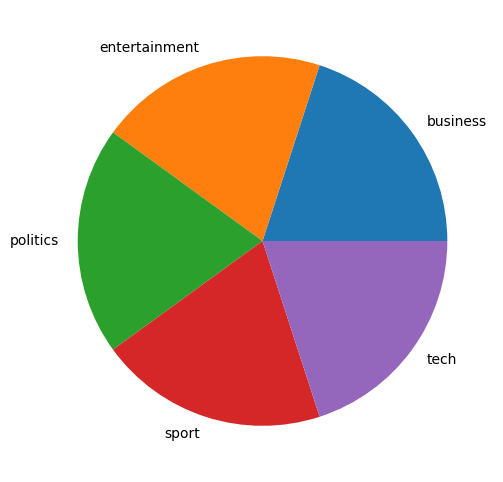

In [16]:
balanced_data.groupby(['Category']).size().plot(kind='pie', figsize=(10, 6))

<Axes: ylabel='Category'>

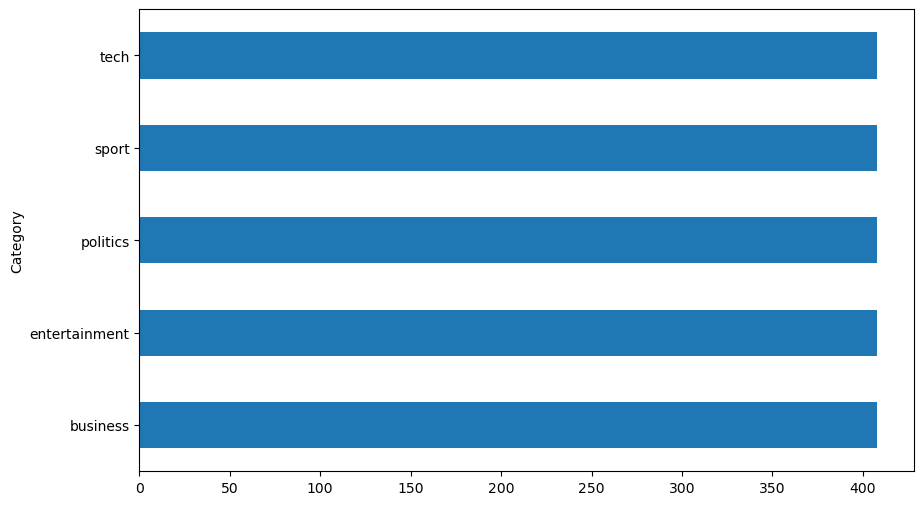

In [17]:
balanced_data.groupby(['Category']).size().sort_values(ascending=True).plot(kind='barh', figsize=(10, 6))

In [18]:
vectorizer = TfidfVectorizer()
document_vectors = vectorizer.fit_transform(balanced_data['clean_text'])

In [19]:
topics = {
    # Sports
    'sports': ["sports", "championship", "soccer", "race", "football", "tennis", "baseball", "hockey", "basketball", "athletics", "rugby", "swimming", "golf", "cycling", "cricket", "marathon", "gymnastics", "boxing", "volleyball", "badminton", "fencing", "wrestling", "snowboarding", "skiing", "horse-racing", "archery", "table-tennis", "e-sports", "fitness", "olympics"],
    
    # Business
    'business': ["business", "finance", "stocks", "economy", "investment", "entrepreneurship", "corporation", "market", "trade", "revenue", "profit", "startup", "loss", "growth", "acquisition", "tax", "debt", "funding", "venture", "capital", "inflation", "interest", "dividends", "corporate", "management", "banking", "insurance", "real-estate", "franchise", "supply-chain"],
    
    # Entertainment
    'entertainment': ["entertainment", "movies", "music", "television", "celebrities", "awards", "festivals", "concert", "theater", "comedy", "drama", "action", "romance", "animation", "documentary", "dance", "art", "literature", "photography", "sculpture", "painting", "opera", "magic", "circus", "museum", "exhibition", "actor", "actress", "singer", "culture"],
    
    # Politics
    'politics': ["politics", "government", "elections", "policy", "democracy", "president", "parliament", "vote", "prime-minister", "congress", "senate", "international", "relations", "diplomacy", "referendum", "constitution", "legislation", "political-party", "campaign", "debate", "rights", "protest", "activism", "military", "intelligence", "treaty", "embassy", "visa", "immigration", "trade-agreements"],
    
    # Tech
    'tech': ["tech", "technology", "innovation", "gadgets", "smartphone", "artificial-intelligence", "robotics", "software", "hardware", "computer", "internet", "cybersecurity", "virtual-reality", "augmented-reality", "machine-learning", "data-science", "blockchain", "cryptocurrency", "internet-of-things", "cloud-computing", "big-data", "quantum-computing", "networking", "operating-system", "mobile-apps", "programming", "research", "drones", "3D-printing", "wearables"]
}

In [20]:
users = [
    {'id': 1, 'interests': ['sports']},
    {'id': 2, 'interests': ['business']},
    {'id': 3, 'interests': ['entertainment']},
    {'id': 4, 'interests': ['politics']},
    {'id': 5, 'interests': ['tech']},
    {'id': 6, 'interests': ['sports', 'business']},
    {'id': 7, 'interests': ['entertainment', 'politics']},
    {'id': 8, 'interests': ['tech', 'sports']},
    {'id': 9, 'interests': ['business', 'entertainment']},
    {'id': 10, 'interests': ['politics', 'tech', 'business']}
]

In [21]:
# Step 1: Create a dictionary with user interests as keys and user IDs as values
interests_users = {}
for user in users:
    user_id = user['id']
    for interest in user['interests']:
        if interest not in interests_users:
            interests_users[interest] = [user_id]
        else:
            interests_users[interest].append(user_id)

# Step 2: Convert user interests into interest vectors using the vectorizer
interest_vectors = {}
for interest, keywords in topics.items():
    interest_vector = vectorizer.transform([' '.join(keywords)])
    interest_vectors[interest] = interest_vector

# Step 3: Calculate cosine similarity between the document and interest vectors
def recommend_users(doc_vector, interest_vectors, interests_users, threshold=0.1):
    recommended_users = set()
    for interest, interest_vector in interest_vectors.items():
        similarity = cosine_similarity(doc_vector, interest_vector)
        if similarity >= threshold:
            recommended_users.update(interests_users[interest])
    return recommended_users

# Step 4: Recommend documents to users based on their cosine similarity scores
doc_recommendations = {}
for index, row in data.iterrows():
    doc_vector = vectorizer.transform([row['clean_text']])
    recommended_users = recommend_users(doc_vector, interest_vectors, interests_users)
    doc_recommendations[row['Text']] = recommended_users

print(doc_recommendations)

In [22]:
# Step 1: Create topic vectors
topic_vectors = {}

for topic, words in topics.items():
    topic_vectors[topic] = np.mean(vectorizer.transform(words), axis=0)

# Step 2: Create user profile vectors
def create_user_profile(user_interests):
    user_profile = np.zeros((1, document_vectors.shape[1]))
    for interest in user_interests:
        user_profile += topic_vectors[interest]
    user_profile /= len(user_interests)
    return user_profile

for user in users:
    user['profile'] = create_user_profile(user['interests'])

# Step 3: Calculate the cosine similarity between each document and user profile
def get_similar_documents(user_profile, threshold=0.5):
    similarities = cosine_similarity(document_vectors, user_profile)
    return np.where(similarities >= threshold)[0]

# Step 4: Match documents to users based on a threshold
matched_documents = {}

for user in users:
    matched_documents[user['id']] = get_similar_documents(user['profile'])

# Step 5: Test the accuracy/performance of the approach
# In this case, we assume that you have a ground truth dataset of which documents should be matched to each user.
# You can compare this with the `matched_documents` to get the accuracy or other performance metrics.

ground_truth = {
    1: set([2, 5, 6]),  # Example of ground truth document IDs for user 1
    # Add ground truth for other users
}

def get_accuracy(ground_truth, matched_documents):
    correct_matches = 0
    total_matches = 0

    for user_id, truth in ground_truth.items():
        predicted = set(matched_documents[user_id])
        correct_matches += len(truth.intersection(predicted))
        total_matches += len(predicted)

    return correct_matches / total_matches

accuracy = get_accuracy(ground_truth, matched_documents)
print(f"Accuracy: {accuracy:.2f}")


ZeroDivisionError: division by zero